# NMFk: Nonnegative Matrix Factorization with $k$-means clustering

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="https://raw.githubusercontent.com/SmartTensors/NMFk.jl/master/logo/nmfk-logo.png" alt="NMFk" width=20% max-width=125px;/>
</div>

**NMFk** is a code within the [SmartTensors](https://github.com/SmartTensors) framework for unsupervised, supervised and physics-informed (scientific) machine learning (ML) and artificial intelligence (AI) ([web](https:///SmartTensors.com) [source](https://github.com/SmartTensors)).

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="https://raw.githubusercontent.com/SmartTensors/NMFk.jl/master/logo/SmartTensorsNewSmall.png" alt="NMFk" width=20% max-width=125px;/>
</div>

## Example Problem

Here is an example problem demonstrating how **NMFk** can be applied to solve a **blind source separation** problem.

The goal is to extract unknown signatures embedded (mixed) in unknown fashion in analyzed datasets.

**NMFk** also identifies how many are the unknown (hidden, latent) signatures.

**NMFk** also estimates the mixing ratios at each sensor.

The extracted signatures can be also unknown sources, signals or features depending on the analyzed dataset

This type of analysis is also called **feature extraction**.

In summary, **NMFk** automatically:
- identifies the number of the unknown mixed signatures in a dataset 
- estimates the shape of the unknown mixed signatures
- estimates how the signatures are mixed at each sensor

## NMFk installation

If **NMFk** is not installed, first execute in the Julia REPL: 

```julia
import Pkg
Pkg.add("NMFk")
Pkg.add("Mads")
```

## Importing NMFk in Julia

In [1]:
import NMFk
import Mads
import Gadfly
import Random

Mads: Model Analysis & Decision Support
====

    ___      ____            ____    ____              ______
   /   \    /    \          /    |  |    \            /  __  \
  |     \  /     |         /     |  |     \          /  /  \__\
  |  |\  \/  /|  |        /      |  |      \        |  |
  |  | \    / |  |       /  /|   |  |   |\  \        \  \______.
  |  |  \__/  |  |      /  / |   |  |   | \  \        \_______  \
  |  |        |  |     /  /  |   |  |   |  \  \               \  \
  |  |        |  |    /  /===|   |  |   |___\  \    __.        |  |
  |  |        |  |   /  /    |   |  |           \   \  \______/  /
  |__|        |__|  /__/     |___|  |____________\   \__________/

MADS is an integrated high-performance computational framework for data- and model-based analyses.
MADS can perform: Sensitivity Analysis, Parameter Estimation, Model Inversion and Calibration, Uncertainty Quantification, Model Selection and Model Averaging, Model Reduction and Surrogate Modeling, Machine L

NMFk: Nonnegative Matrix Factorization + k-means clustering and physics constraints


====



  _     _   _      _   _______   _
 |  \  | | |  \  /  | |  _____| | |  _
 | . \ | | | . \/ . | | |___    | | / /
 | |\ \| | | |\  /| | |  ___|   | |/ /
 | | \ ' | | | \/ | | | |       |   (


 | |  \  | | |    | | | |       | |\ \
 |_|   \_| |_|    |_| |_|       |_| \_\



NMFk performs unsupervised machine learning based on matrix decomposition coupled with various constraints.
NMFk provides automatic identification of the optimal number of signals (features) present in two-dimensional data arrays (matrices).
NMFk offers visualization, pre-, and post-processing capabilities.

## Problem setup 

Let us generate 3 random signals:

In [2]:
Random.seed!(2021);

a = rand(15)
b = rand(15)
c = rand(15)
[a b c]

15×3 Matrix{Float64}:
 0.405796   0.705261   0.592091
 0.0657738  0.0900316  0.802722
 0.398162   0.0208244  0.782083
 0.163816   0.0835003  0.316525
 0.783094   0.634718   0.803177
 0.134115   0.0967049  0.0685768
 0.883121   0.664583   0.73253
 0.386875   0.61921    0.846265
 0.242105   0.402028   0.361288
 0.131588   0.0956702  0.390644
 0.085331   0.219395   0.344963
 0.330099   0.637804   0.094793
 0.654601   0.590012   0.45923
 0.467328   0.947572   0.271188
 0.889334   0.936274   0.567385

The singals look like this:

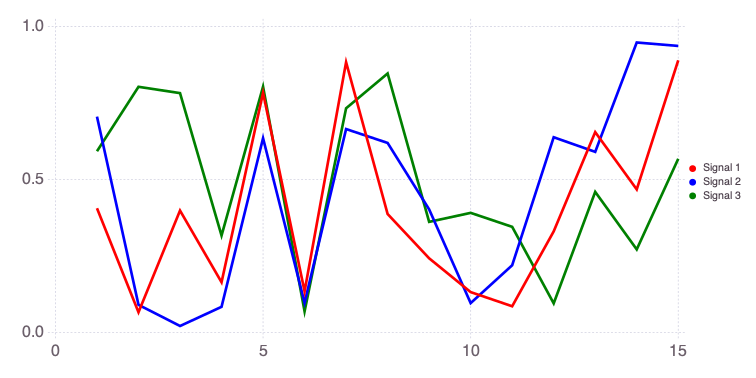

In [3]:
Mads.plotseries([a b c])

We can collect the 3 signal vectors into a signal matrix `W`:

In [4]:
W = [a b c]

15×3 Matrix{Float64}:
 0.405796   0.705261   0.592091
 0.0657738  0.0900316  0.802722
 0.398162   0.0208244  0.782083
 0.163816   0.0835003  0.316525
 0.783094   0.634718   0.803177
 0.134115   0.0967049  0.0685768
 0.883121   0.664583   0.73253
 0.386875   0.61921    0.846265
 0.242105   0.402028   0.361288
 0.131588   0.0956702  0.390644
 0.085331   0.219395   0.344963
 0.330099   0.637804   0.094793
 0.654601   0.590012   0.45923
 0.467328   0.947572   0.271188
 0.889334   0.936274   0.567385

Now, we can mix the signals in matrix `W` to produce a data matrix `X` representing data collected at 5 sensors (e.g., measurement devices or montoring wells at different locations).

Each of the 5 sensors is observing some mixture of the signals in `W`.

The way the 3 signals are mixed at the sensors is represented by the mixing matrix `H`.

Let us define the mixing matrix `H` as:

In [5]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

3×5 Matrix{Int64}:
 1  10  0  0  1
 0   1  1  5  2
 3   0  0  1  5

Each column of the `H` matrix defines how the 3 signals are represented in each sensors.

For example, the first sensor (`Column 1`) detects only `Signals 1 and 3`.
`Signal 2` is missing because `H[2,1]` is equal to zero.

The second sensor (`Column 2`) detects `Signals 1 and 2`.
`Signal 3` is missing because `H[3,2]` is equal to zero.

The third sensor (`Column 3`) detects `Signals 1 and 2`.
`Signal 3` is missing because `H[3,2]` is equal to zero.

The entries of `H` matrix also define the proportions at which the signals are mixed.

For example, the first sensor (column 1 above) detects `Signal 3` three times stronger than `Signal 1`.

The data matrix `X` is formed by multiplying `W` and `H` matrices. 

`X` defines the actual dataset observed at the 4 sensors.

In [6]:
X = W * H

15×5 Matrix{Float64}:
 2.18207   4.76322  0.705261   4.11839   4.77677
 2.47394   0.74777  0.0900316  1.25288   4.25945
 2.74441   4.00244  0.0208244  0.886205  4.35023
 1.11339   1.72166  0.0835003  0.734027  1.91344
 3.19262   8.46565  0.634718   3.97677   6.06841
 0.339846  1.43786  0.0967049  0.552101  0.670409
 3.08071   9.49579  0.664583   4.05544   5.87494
 2.92567   4.48796  0.61921    3.94231   5.85662
 1.32597   2.82307  0.402028   2.37143   2.8526
 1.30352   1.41155  0.0956702  0.868995  2.27615
 1.12022   1.07271  0.219395   1.44194   2.24894
 0.614478  3.93879  0.637804   3.28381   2.07967
 2.03229   7.13603  0.590012   3.40929   4.13078
 1.28089   5.62085  0.947572   5.00905   3.71841
 2.59149   9.82962  0.936274   5.24876   5.59881

The data matrix `X` looks like this:

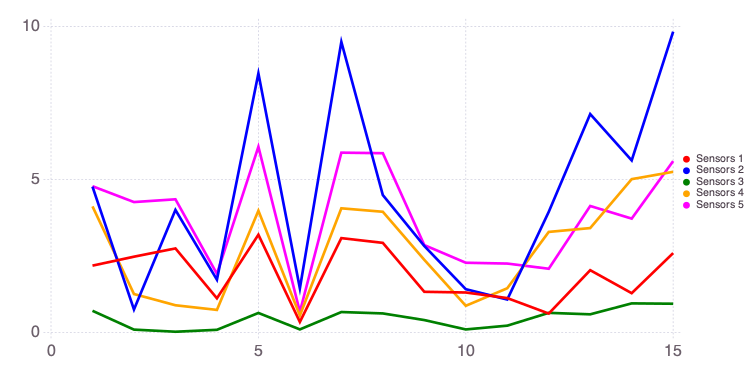

In [7]:
Mads.plotseries(X; name="Sensors")

## NMFk analysis

Now, we can assume that we only know the data matrix `X`.

The `W` and `H` matrices are assumed to be unknown.
They will be estimated automatically (blindly) by **NMFk**.

**NMFk** analysis of the data matrix `X` will automatically:

- identify the number of the unknown mixed signals in `X` 
- estimate the shape of the unknown mixed signals (i.e., estimate the entries of `W` matrix)
- estimate how the signals are mixed at each sensors (i.e., estimate the entries of `H` matrix)

This can be done based only on the information in `X`:

In [8]:
We, He, fitquality, robustness, aic, kopt = NMFk.execute(X, 2:5; save=false, method=:simple);


OF: min 13.938575834075827 max 13.939149136011867 mean 13.939023936576564 std 0.00015978979250667993


Worst correlation by columns: 0.9089534909911938


Worst correlation by rows: 0.9138316304619002
Worst covariance by columns: 0.2104805928843496


Worst covariance by rows: 0.09047546204242647
Worst norm by columns: 0.43794006677052216


Worst norm by rows: 0.7401885751830948


Signals:  2 Fit:     13.93858 Silhouette:    0.9940184 AIC:    -46.21209 Signal order: [2, 1]



OF: min 2.1911664491732534e-6 max 0.03711703712024368 mean 0.008921756575796008 std 0.012217855601755515
Worst correlation by columns: 0.9999996871358519
Worst correlation by rows: 0.9999999467283969
Worst covariance by columns: 0.25687300064658025
Worst covariance by rows: 0.10477788224532734
Worst norm by columns: 0.795184210425011
Worst norm by rows: 0.7299738316665152
Signals:  3 Fit: 2.191166e-06 Silhouette:    0.7097371 AIC:    -1181.142 Signal order: [2, 3, 1]



OF: min 2.877455695118232e-7 max 0.007167581000578781 mean 0.001043172561235765 std 0.0022045302570061717
Worst correlation by columns: 0.9999999966490337
Worst correlation by rows: 0.9999999750381271
Worst covariance by columns: 0.2570941431322106
Worst covariance by rows: 0.10477628207076062
Worst norm by columns: 0.5126998474538412
Worst norm by rows: 0.7486400734293462
Signals:  4 Fit: 2.877456e-07 Silhouette:    0.3770708 AIC:    -1293.401 Signal order: [2, 3, 4, 1]

OF: min 2.2183368055932843e-6 max 0.010281220182692433 mean 0.0023151582431914235 std 0.003832905360228223
Worst correlation by columns: 0.9999999407042833
Worst correlation by rows: 0.9999999450480098
Worst covariance by columns: 0.2570834472155579
Worst covariance by rows: 0.10476793011203807
Worst norm by columns: 0.706479560331746
Worst norm by rows: 0.6816152071162849
Signals:  5 Fit: 2.218337e-06 Silhouette:   -0.5794082 AIC:    -1100.218 Signal order: [5, 1, 2, 4, 3]


Signals:  2 Fit:     13.93858 Silhouette:    0.9940184 AIC:    -46.21209
Signals:  3 Fit: 2.191166e-06 Silhouette:    0.7097371 AIC:    -1181.142
Signals:  4 Fit: 2.877456e-07 Silhouette:    0.3770708 AIC:    -1293.401
Signals:  5 Fit: 2.218337e-06 Silhouette:   -0.5794082 AIC:    -1100.218


┌ Info: Results
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkExecute.jl:15
┌ Info: Optimal solution: 3 signals
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkExecute.jl:23


**NMFk** returns the estimated optimal number of signals `kopt` which in this case, as expected, is equal to 3.

The optimal number of signals is estimated using the following graph showing the quality (fit) and robustness of the soultion vs. number of signals:

In [ ]:
NMFk.plot_feature_selecton(2:5, fitquality, robustness)

**NMFk** also returns estimates of matrices `W` and `H`.

Here, the estimates of matrices W and H are stored as `We` and `He` objects.

`We[kopt]` and `He[kopt]` are scaled versions of the original `W` and `H` matrices:

In [9]:
We[kopt]

15×3 Matrix{Float64}:
  3.83705    7.73812    4.97055
  0.116595   0.67972    8.02776
  6.63015    1.7091e-9  5.37396
  2.39293    0.840371   2.33272
 10.9901     6.95622    4.39182
  1.99473    1.08654    0.0156484
 12.7769     7.3464     3.04815
  3.65363    6.66188    7.51626
  2.36714    4.40365    3.00431
  1.67387    0.936381   3.34564
  0.292837   2.32771    3.48265
  3.1683     7.17742    0.208837
  9.10256    6.57062    1.62522
  4.16325   10.6015     1.812
 11.8058    10.4573     1.94185

In [10]:
He[kopt]

3×5 Matrix{Float64}:
 0.166349   0.555428   0.000161808  0.0375717  0.240489
 0.0032828  0.301899   0.0886785    0.437484   0.168656
 0.305472   0.0595241  0.00368722   0.118509   0.512808

The extracted signals are ordered by their expected importance.

The most dominant is the first signal, which is captured by `Column 1` of `We[kopt]` and Row 1 of `He[kopt]`.

The least dominant is the third (last) signal, which is captured by `Column 3` of `We[kopt]` and Row 3 of `He[kopt]`.

Note that the order of columns ('signals') in `W` and `We[kopt]` matrices are not expected to match.

In the same way, the order of rows ('sensors') in `H` and `He[kopt]` matrices are also not expected to match.

In general, the estimated order of 'signals' may be slightly different every time the code is executed due to randomness of the processes.

Below are plots providing comparisons between the original and estimated `W` an `H` matrices.


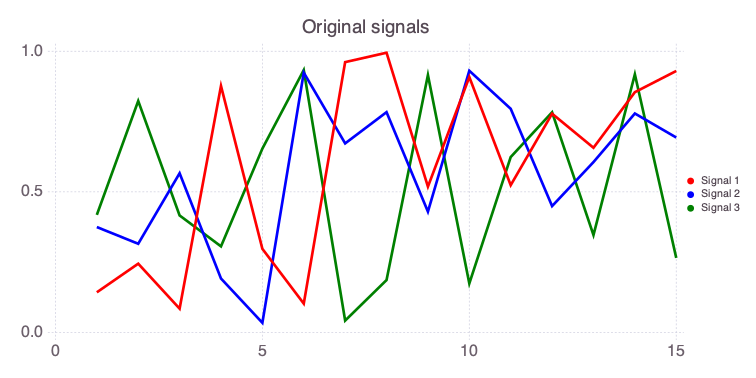

In [ ]:
Mads.plotseries(W; title="Original signals")

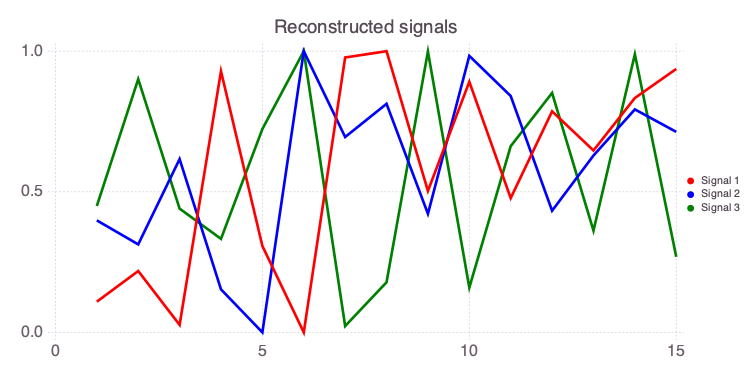

In [ ]:
Mads.plotseries(We[kopt] ./ maximum(We[kopt]; dims=1); title="Reconstructed signals")

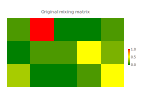

In [ ]:
NMFk.plotmatrix(H ./ maximum(H; dims=2); title="Original mixing matrix")

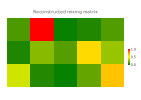

In [ ]:
NMFk.plotmatrix(He[kopt] ./ maximum(He[kopt]; dims=2); title="Reconstructed mixing matrix")

## NMFk Pros
- Automatic identification of interpretable hidden (latent) data signals (signatures/features)
- Reduction of data dimensionality
- Detection of outlier, random and systematic noise
- Detection of data gaps
- Filling-in of data gaps
- Applicable to any dataset with nonnegative entries (if there are nonnegative entries they can removed through transformations)
- Applicable in a wide range problems: text mining, document clustering, making recommendations, visual pattern recognition, face recognition, gene expression analysis, feature extraction, source separation, etc. 

## NMFk Cons
- Computationally intensive
- Limited scaleability

## Math behind NMF

**NMF** factorizes (splits up) a non-negative input matrix ($\mathbf{X}$) into two smaller rank matrices $\mathbf{W}$ and $\mathbf{H}$.

To achieve this, **NMF** minimizes the following function:

$$
\Vert \mathbf{X} - \mathbf{W} \times \mathbf{H} \Vert_2
$$

**NMF** starts with either random or specified initialization of $\mathbf{W}$ and $\mathbf{H}$ matrices.

**NMF** estimates $\mathbf{W}$ and $\mathbf{H}$ that approximate $\mathbf{X}$.